## LDA

In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

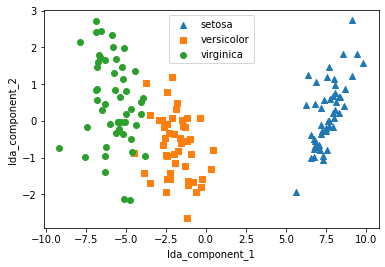

In [7]:
lda_columns = ['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target'] = iris.target

markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target'] == i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target'] == i]['lda_component_2']
    
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.legend()
plt.show()

## SVD

In [11]:
import numpy as np
from numpy.linalg import svd

In [12]:
np.random.seed(121)
a = np.random.randn(4, 4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [14]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n', np.round(U, 3))
print('Sigma Value:\n', np.round(Sigma, 3))
print('V transpose matrix:\n', np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [15]:
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [16]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [17]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n', np.round(Sigma, 3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


In [22]:
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)

a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


### Truncated SVD

In [23]:
from scipy.sparse.linalg import svds
from scipy.linalg import svd

In [25]:
np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬:\n', matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:', U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)

matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr)
print('\nTruncated SVD 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 0

### 사이킷런 TruncatedSVD 클래스를 이용한 변환

Text(0, 0.5, 'TruncatedSVD Component 2')

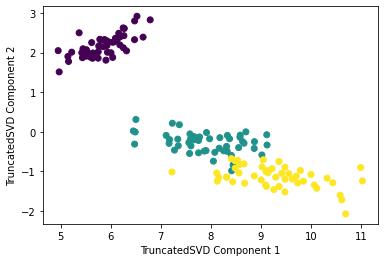

In [27]:
from sklearn.decomposition import TruncatedSVD, PCA

iris = load_iris()
iris_ftrs = iris.data
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

plt.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:, 1], c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

Text(0.5, 1.0, 'PCA Trasnformed')

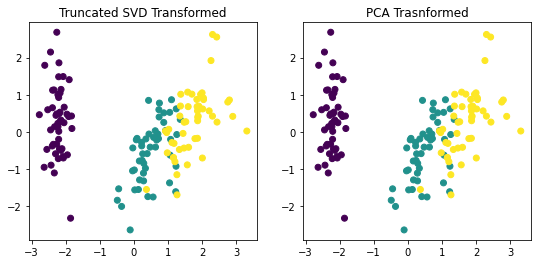

In [28]:
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

fig, (ax1, ax2) = plt.subplots(figsize=(9, 4), ncols=2)
ax1.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:, 1], c=iris.target)
ax2.scatter(x=iris_pca[:, 0], y=iris_pca[:, 1], c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Trasnformed')

In [29]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.3320465928714875e-15
-5.984795992119984e-17


## NMF

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Text(0, 0.5, 'NMF component 2')

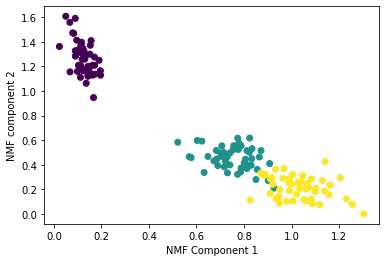

In [30]:
from sklearn.decomposition import NMF

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)

plt.scatter(x=iris_nmf[:, 0], y=iris_nmf[:, 1], c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF component 2')